In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir('/content/drive/MyDrive/India Pollution Analysis')
os.listdir()

['india_pollution_2016-2020_near_diwali.csv',
 'month_before_diwali.csv',
 'final_measure.csv',
 'pollution_by_station_by_hour.csv',
 'District SHP',
 'Constituency SHP',
 'Summary.gdoc',
 'location_geometry.csv',
 "Cristian's Notebooks",
 'india_pollution_monitors.csv',
 'india_pollution_firecrackerban_data.csv',
 'SO2_Pollution.png',
 'NO2_Pollution.png',
 'PM2.5_Pollution.png',
 'pm10_Pollution.png',
 'Firecracker_Ban_Monitor_Data.xlsx',
 'RA_poster.pptx',
 'Firecracker_ban_fulldata.xlsx']

In [ ]:
import pandas as pd
!pip install requests fuzzywuzzy 
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

The folder you are executing pip from can no longer be found.


In [ ]:
india_pollution_neardiwali = pd.read_csv('india_pollution_2016-2020_near_diwali.csv')
india_pollution_beforediwali = pd.read_csv('month_before_diwali.csv')
india_firecracker_ban_2020 = pd.read_excel('Firecracker_Ban_Monitor_Data.xlsx')

In [ ]:
india_pollution_neardiwali.head()

,Unnamed: 0,date.local,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
0,0,2019-10-30 11:45:00,"Zoo Park, Hyderabad - TSPCB",pm25,55.0,b'\xc2\xb5g/m\xc2\xb3',IN,Hyderabad,2019-10-30 06:15:00+00:00,17.349694,78.451437
1,1,2019-10-30 11:45:00,"Zoo Park, Hyderabad - TSPCB",no2,36.8,b'\xc2\xb5g/m\xc2\xb3',IN,Hyderabad,2019-10-30 06:15:00+00:00,17.349694,78.451437
2,2,2019-10-30 11:45:00,"Zoo Park, Hyderabad - TSPCB",so2,1.9,b'\xc2\xb5g/m\xc2\xb3',IN,Hyderabad,2019-10-30 06:15:00+00:00,17.349694,78.451437
3,3,2019-10-30 11:45:00,"Zoo Park, Hyderabad - TSPCB",pm10,100.0,b'\xc2\xb5g/m\xc2\xb3',IN,Hyderabad,2019-10-30 06:15:00+00:00,17.349694,78.451437
4,4,2019-10-30 11:45:00,"Zoo Park, Hyderabad - TSPCB",o3,29.2,b'\xc2\xb5g/m\xc2\xb3',IN,Hyderabad,2019-10-30 06:15:00+00:00,17.349694,78.451437


In [ ]:
# create pollution monitor dataset that only returns single data from each monitor 
india_pollution_monitors = india_pollution_neardiwali.drop_duplicates(subset = 'location')

In [ ]:
india_pollution_monitors = india_pollution_monitors.drop(['value'], axis = 1)

In [ ]:
india_pollution_monitors.to_csv('india_pollution_monitors.csv')

In [ ]:
pollution_data = pd.read_csv('pollution_by_station_by_hour.csv')

In [ ]:
len(pollution_data)

54837

In [ ]:
pollution_data = pollution_data[pollution_data['year'] == 2020]

In [ ]:
india_firecracker_ban_2020 = india_firecracker_ban_2020.drop(['value'], axis = 1)

In [ ]:
len(pollution_data)

20188

In [ ]:
india_fulldata_firecrackerban = india_firecracker_ban_2020.merge(pollution_data, how = 'right', left_on = 'location', right_on = 'location')

In [ ]:
india_fulldata_firecrackerban.to_csv('india_pollution_firecrackerban_data.csv')

In [ ]:
india_fulldata_firecrackerban.columns

Index(['FID', 'Join_Count', 'TARGET_FID', 'JOIN_FID', 'objectid', 'statecode',
       'statename', 'state_ut', 'distcode', 'distname', 'distarea',
       'totalpopul', 'totalhh', 'totpopmale', 'totpopfema', 'st_areasha',
       'st_lengths', 'State', 'District', 'Has_Non_At', 'Only_Green',
       'Restricted', 'Complete_B', 'Complete_1', 'State_Wide', 'State_Gaze',
       'Source', 'Field11', 'Field12', 'Field13', 'Field1', 'Unnamed__0',
       'date_local', 'location', 'parameter_x', 'unit', 'country', 'city_x',
       'date_utc', 'coordinate', 'coordina_1', 'Lat', 'Long', 'city_y', 'year',
       'parameter_y', 'night', 'days_since_diwali', 'hour', 'zscore', 'value'],
      dtype='object')

In [ ]:
india_fulldata_firecrackerban


,FID,Join_Count,TARGET_FID,JOIN_FID,objectid,statecode,statename,state_ut,distcode,distname,distarea,totalpopul,totalhh,totpopmale,totpopfema,st_areasha,st_lengths,State,District,Has_Non_At,Only_Green,Restricted,Complete_B,Complete_1,State_Wide,State_Gaze,Source,Field11,Field12,Field13,Field1,Unnamed__0,date_local,location,parameter_x,unit,country,city_x,date_utc,coordinate,coordina_1,Lat,Long,city_y,year,parameter_y,night,days_since_diwali,hour,zscore,value
0,797.0,1.0,679.0,21.0,652.0,33.0,Tamil Nadu,STATE,604,Kancheepuram,4483.0,3998252.0,1006245.0,2012958.0,1985294.0,4.716387e+09,425113.678101,Tamil Nadu,,0.0,1.0,1.0,0.0,0.0,0.0,0.0,,,,,375603.0,0.0,2018-11-19,"Alandur Bus Depot, Chennai - CPCB",no2,b'\xc2\xb5g/m\xc2\xb3',IN,Chennai,2018-11-19 16:00:00+00:00,12.909916,80.107654,12.909916,80.107654,Chennai,2020,co,-15,-14.333333,8.666667,-0.309995,348.333333
1,797.0,1.0,679.0,21.0,652.0,33.0,Tamil Nadu,STATE,604,Kancheepuram,4483.0,3998252.0,1006245.0,2012958.0,1985294.0,4.716387e+09,425113.678101,Tamil Nadu,,0.0,1.0,1.0,0.0,0.0,0.0,0.0,,,,,375603.0,0.0,2018-11-19,"Alandur Bus Depot, Chennai - CPCB",no2,b'\xc2\xb5g/m\xc2\xb3',IN,Chennai,2018-11-19 16:00:00+00:00,12.909916,80.107654,12.909916,80.107654,Chennai,2020,co,-13,-12.600000,13.400000,-0.334985,321.000000
2,797.0,1.0,679.0,21.0,652.0,33.0,Tamil Nadu,STATE,604,Kancheepuram,4483.0,3998252.0,1006245.0,2012958.0,1985294.0,4.716387e+09,425113.678101,Tamil Nadu,,0.0,1.0,1.0,0.0,0.0,0.0,0.0,,,,,375603.0,0.0,2018-11-19,"Alandur Bus Depot, Chennai - CPCB",no2,b'\xc2\xb5g/m\xc2\xb3',IN,Chennai,2018-11-19 16:00:00+00:00,12.909916,80.107654,12.909916,80.107654,Chennai,2020,co,-12,-11.400000,9.200000,-0.506864,133.000000
3,797.0,1.0,679.0,21.0,652.0,33.0,Tamil Nadu,STATE,604,Kancheepuram,4483.0,3998252.0,1006245.0,2012958.0,1985294.0,4.716387e+09,425113.678101,Tamil Nadu,,0.0,1.0,1.0,0.0,0.0,0.0,0.0,,,,,375603.0,0.0,2018-11-19,"Alandur Bus Depot, Chennai - CPCB",no2,b'\xc2\xb5g/m\xc2\xb3',IN,Chennai,2018-11-19 16:00:00+00:00,12.909916,80.107654,12.909916,80.107654,Chennai,2020,co,-11,-10.500000,11.250000,-0.518749,120.000000
4,797.0,1.0,679.0,21.0,652.0,33.0,Tamil Nadu,STATE,604,Kancheepuram,4483.0,3998252.0,1006245.0,2012958.0,1985294.0,4.716387e+09,425113.678101,Tamil Nadu,,0.0,1.0,1.0,0.0,0.0,0.0,0.0,,,,,375603.0,0.0,2018-11-19,"Alandur Bus Depot, Chennai - CPCB",no2,b'\xc2\xb5g/m\xc2\xb3',IN,Chennai,2018-11-19 16:00:00+00:00,12.909916,80.107654,12.909916,80.107654,Chennai,2020,co,-10,-10.000000,23.000000,-0.591889,40.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20183,803.0,1.0,685.0,0.0,667.0,36.0,Telangana,STATE,T3,Hydrabad,0.0,3943323.0,849051.0,2018575.0,1924748.0,3.102419e+08,114763.013161,Telangana,,1.0,0.0,0.0,1.0,1.0,1.0,1.0,,,,,0.0,0.0,2019-10-30,"Zoo Park, Hyderabad - TSPCB",pm25,b'\xc2\xb5g/m\xc2\xb3',IN,Hyderabad,2019-10-30 06:15:00+00:00,17.349694,78.451437,17.349694,78.451437,Hyderabad,2020,so2,9,9.666667,8.666667,-0.228322,4.055556
20184,803.0,1.0,685.0,0.0,667.0,36.0,Telangana,STATE,T3,Hydrabad,0.0,3943323.0,849051.0,2018575.0,1924748.0,3.102419e+08,114763.013161,Telangana,,1.0,0.0,0.0,1.0,1.0,1.0,1.0,,,,,0.0,0.0,2019-10-30,"Zoo Park, Hyderabad - TSPCB",pm25,b'\xc2\xb5g/m\xc2\xb3',IN,Hyderabad,2019-10-30 06:15:00+00:00,17.349694,78.451437,17.349694,78.451437,Hyderabad,2020,so2,10,10.000000,21.000000,-1.300560,3.100000
20185,803.0,1.0,685.0,0.0,667.0,36.0,Telangana,STATE,T3,Hydrabad,0.0,3943323.0,849051.0,2018575.0,1924748.0,3.102419e+08,114763.013161,Telangana,,1.0,0.0,0.0,1.0,1.0,1.0,1.0,,,,,0.0,0.0,2019-10-30,"Zoo Park, Hyderabad - TSPCB",pm25,b'\xc2\xb5g/m\xc2\xb3',IN,Hyderabad,2019-10-30 06:15:00+00:00,17.349694,78.451437,17.349694,78.451437,Hyderabad,2020,so2,11,12.000000,1.000000,1.111976,5.250000
20186,803.0,1.0,685.0,0.0,667.0,36.0,Telangana,STATE,T3,Hydrabad,0.0,3943323.0,849051.0,2018

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0, 0.5, 'Pollution Levels Normalized')

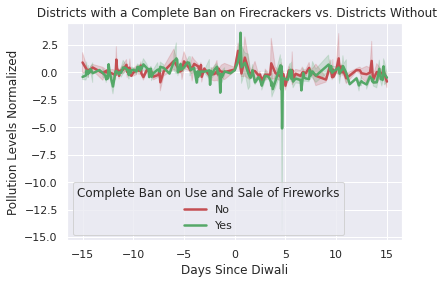

In [ ]:

sns.set_theme(style="darkgrid")
sns.lineplot(x = 'days_since_diwali', y = 'zscore',hue = 'Complete_B',data = india_fulldata_firecrackerban,palette=['r', 'g'], linewidth=2.5, ci=95)
sns.set(rc = {'figure.figsize': (20, 5)})
plt.title(" Districts with a Complete Ban on Firecrackers vs. Districts Without")
plt.legend(title='Complete Ban on Use and Sale of Fireworks', labels=['No', 'Yes'])
plt.xlabel('Days Since Diwali')
plt.ylabel('Pollution Levels Normalized')


In [ ]:
import plotly.graph_objects as go 
import plotly.express as px
import pandas as pd 
import math 

In [ ]:
# graph of CO levels in Districts with Ban vs. Districts without Complete Ban 

In [ ]:
import numpy as np
np.unique(india_fulldata_firecrackerban['parameter_y'])

array(['co', 'no2', 'o3', 'pm10', 'pm25', 'so2'], dtype=object)

In [ ]:
co_pollution = india_fulldata_firecrackerban[india_fulldata_firecrackerban['parameter_y'] == 'co']


In [ ]:
co_pollution

,FID,Join_Count,TARGET_FID,JOIN_FID,objectid,statecode,statename,state_ut,distcode,distname,distarea,totalpopul,totalhh,totpopmale,totpopfema,st_areasha,st_lengths,State,District,Has_Non_At,Only_Green,Restricted,Complete_B,Complete_1,State_Wide,State_Gaze,Source,Field11,Field12,Field13,Field1,Unnamed__0,date_local,location,parameter_x,unit,country,city_x,date_utc,coordinate,coordina_1,Lat,Long,city_y,year,parameter_y,night,days_since_diwali,hour,zscore,value
0,797.0,1.0,679.0,21.0,652.0,33.0,Tamil Nadu,STATE,604,Kancheepuram,4483.0,3998252.0,1006245.0,2012958.0,1985294.0,4.716387e+09,425113.678101,Tamil Nadu,,0.0,1.0,1.0,0.0,0.0,0.0,0.0,,,,,375603.0,0.0,2018-11-19,"Alandur Bus Depot, Chennai - CPCB",no2,b'\xc2\xb5g/m\xc2\xb3',IN,Chennai,2018-11-19 16:00:00+00:00,12.909916,80.107654,12.909916,80.107654,Chennai,2020,co,-15,-14.333333,8.666667,-0.309995,348.333333
1,797.0,1.0,679.0,21.0,652.0,33.0,Tamil Nadu,STATE,604,Kancheepuram,4483.0,3998252.0,1006245.0,2012958.0,1985294.0,4.716387e+09,425113.678101,Tamil Nadu,,0.0,1.0,1.0,0.0,0.0,0.0,0.0,,,,,375603.0,0.0,2018-11-19,"Alandur Bus Depot, Chennai - CPCB",no2,b'\xc2\xb5g/m\xc2\xb3',IN,Chennai,2018-11-19 16:00:00+00:00,12.909916,80.107654,12.909916,80.107654,Chennai,2020,co,-13,-12.600000,13.400000,-0.334985,321.000000
2,797.0,1.0,679.0,21.0,652.0,33.0,Tamil Nadu,STATE,604,Kancheepuram,4483.0,3998252.0,1006245.0,2012958.0,1985294.0,4.716387e+09,425113.678101,Tamil Nadu,,0.0,1.0,1.0,0.0,0.0,0.0,0.0,,,,,375603.0,0.0,2018-11-19,"Alandur Bus Depot, Chennai - CPCB",no2,b'\xc2\xb5g/m\xc2\xb3',IN,Chennai,2018-11-19 16:00:00+00:00,12.909916,80.107654,12.909916,80.107654,Chennai,2020,co,-12,-11.400000,9.200000,-0.506864,133.000000
3,797.0,1.0,679.0,21.0,652.0,33.0,Tamil Nadu,STATE,604,Kancheepuram,4483.0,3998252.0,1006245.0,2012958.0,1985294.0,4.716387e+09,425113.678101,Tamil Nadu,,0.0,1.0,1.0,0.0,0.0,0.0,0.0,,,,,375603.0,0.0,2018-11-19,"Alandur Bus Depot, Chennai - CPCB",no2,b'\xc2\xb5g/m\xc2\xb3',IN,Chennai,2018-11-19 16:00:00+00:00,12.909916,80.107654,12.909916,80.107654,Chennai,2020,co,-11,-10.500000,11.250000,-0.518749,120.000000
4,797.0,1.0,679.0,21.0,652.0,33.0,Tamil Nadu,STATE,604,Kancheepuram,4483.0,3998252.0,1006245.0,2012958.0,1985294.0,4.716387e+09,425113.678101,Tamil Nadu,,0.0,1.0,1.0,0.0,0.0,0.0,0.0,,,,,375603.0,0.0,2018-11-19,"Alandur Bus Depot, Chennai - CPCB",no2,b'\xc2\xb5g/m\xc2\xb3',IN,Chennai,2018-11-19 16:00:00+00:00,12.909916,80.107654,12.909916,80.107654,Chennai,2020,co,-10,-10.000000,23.000000,-0.591889,40.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20063,803.0,1.0,685.0,0.0,667.0,36.0,Telangana,STATE,T3,Hydrabad,0.0,3943323.0,849051.0,2018575.0,1924748.0,3.102419e+08,114763.013161,Telangana,,1.0,0.0,0.0,1.0,1.0,1.0,1.0,,,,,0.0,0.0,2019-10-30,"Zoo Park, Hyderabad - TSPCB",pm25,b'\xc2\xb5g/m\xc2\xb3',IN,Hyderabad,2019-10-30 06:15:00+00:00,17.349694,78.451437,17.349694,78.451437,Hyderabad,2020,co,9,9.666667,8.666667,0.398569,243.333333
20064,803.0,1.0,685.0,0.0,667.0,36.0,Telangana,STATE,T3,Hydrabad,0.0,3943323.0,849051.0,2018575.0,1924748.0,3.102419e+08,114763.013161,Telangana,,1.0,0.0,0.0,1.0,1.0,1.0,1.0,,,,,0.0,0.0,2019-10-30,"Zoo Park, Hyderabad - TSPCB",pm25,b'\xc2\xb5g/m\xc2\xb3',IN,Hyderabad,2019-10-30 06:15:00+00:00,17.349694,78.451437,17.349694,78.451437,Hyderabad,2020,co,10,10.000000,21.000000,0.582649,250.000000
20065,803.0,1.0,685.0,0.0,667.0,36.0,Telangana,STATE,T3,Hydrabad,0.0,3943323.0,849051.0,2018575.0,1924748.0,3.102419e+08,114763.013161,Telangana,,1.0,0.0,0.0,1.0,1.0,1.0,1.0,,,,,0.0,0.0,2019-10-30,"Zoo Park, Hyderabad - TSPCB",pm25,b'\xc2\xb5g/m\xc2\xb3',IN,Hyderabad,2019-10-30 06:15:00+00:00,17.349694,78.451437,17.349694,78.451437,Hyderabad,2020,co,11,12.000000,1.000000,-0.521829,210.000000
20066,803.0,1.0,685.0,0.0,667.0,36.0,Telangana,STATE,T3,Hydrabad,0.0,3943323.0,849051.0,20

In [ ]:
india_fulldata_firecrackerban.groupby(by = ['location']).size().to_frame()

,0
location,
"Alandur Bus Depot, Chennai - CPCB",115
"Alipur, Delhi - DPCC",129
"Anand Vihar, Delhi - DPCC",140
"Anand Vihar, Hapur - UPPCB",92
"Ardhali Bazar, Varanasi - UPPCB",108
...,...
"Vivek Vihar, Delhi - DPCC",86
"Vyttila, Kochi - Kerala PCB",120
"Wazirpur, Delhi - DPCC",102


In [ ]:
co_pollution[co_pollution['Complete_B'] == 1].groupby('location').size()

location
Alipur, Delhi - DPCC               22
Anand Vihar, Delhi - DPCC          23
Arya Nagar, Bahadurgarh - HSPCB    23
Ashok Vihar, Delhi - DPCC          12
Aya Nagar, Delhi - IMD             27
                                   ..
Teri Gram, Gurugram - HSPCB        28
Vikas Sadan, Gurugram - HSPCB      27
Vivek Vihar, Delhi - DPCC          14
Wazirpur, Delhi - DPCC             17
Zoo Park, Hyderabad - TSPCB        24
Length: 72, dtype: int64

In [ ]:
co_pollution[co_pollution['Complete_B'] == 0].groupby('location').size()

location
Alandur Bus Depot, Chennai - CPCB          23
BTM Layout, Bengaluru - CPCB               27
BWSSB Kadabesanahalli, Bengaluru - CPCB    26
Bandra, Mumbai - MPCB                      26
Borivali East, Mumbai - MPCB               26
                                           ..
Vidayagiri, Bagalkot - KSPCB               27
Vijay Nagar, Ramanagara - KSPCB            20
Vile Parle West, Mumbai - MPCB             25
Vyttila, Kochi - Kerala PCB                20
Worli, Mumbai - MPCB                       25
Length: 64, dtype: int64

Text(0, 0.5, 'CO Pollution Levels Normalized')

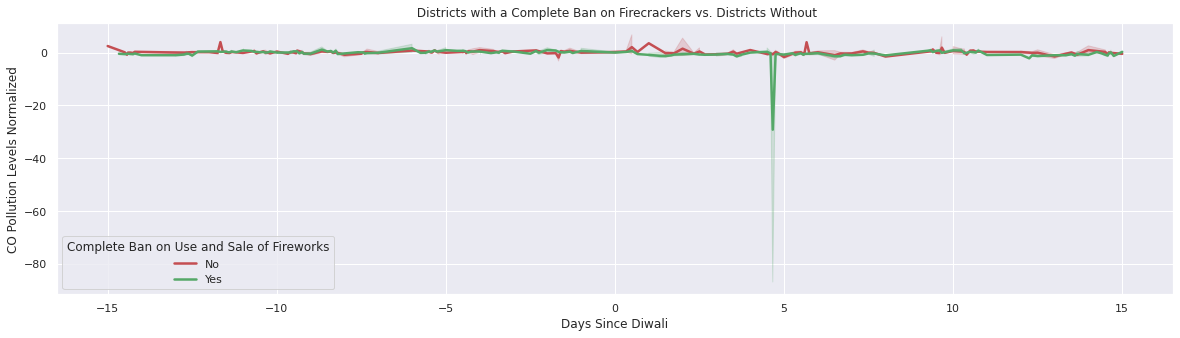

In [ ]:
sns.set_theme(style="darkgrid")
sns.lineplot(x = 'days_since_diwali', y = 'zscore',hue = 'Complete_B',data = co_pollution,palette=['r', 'g'], linewidth=2.5, ci=95)
sns.set(rc = {'figure.figsize': (20, 5)})
plt.title(" Districts with a Complete Ban on Firecrackers vs. Districts Without")
plt.legend(title='Complete Ban on Use and Sale of Fireworks', labels=['No', 'Yes'])
plt.xlabel('Days Since Diwali')
plt.ylabel('CO Pollution Levels Normalized')

In [ ]:
np.unique(india_fulldata_firecrackerban['parameter_y'])

array(['co', 'no2', 'o3', 'pm10', 'pm25', 'so2'], dtype=object)

In [ ]:
pm25_pollution_data = india_fulldata_firecrackerban[india_fulldata_firecrackerban['parameter_y'] == 'pm25']

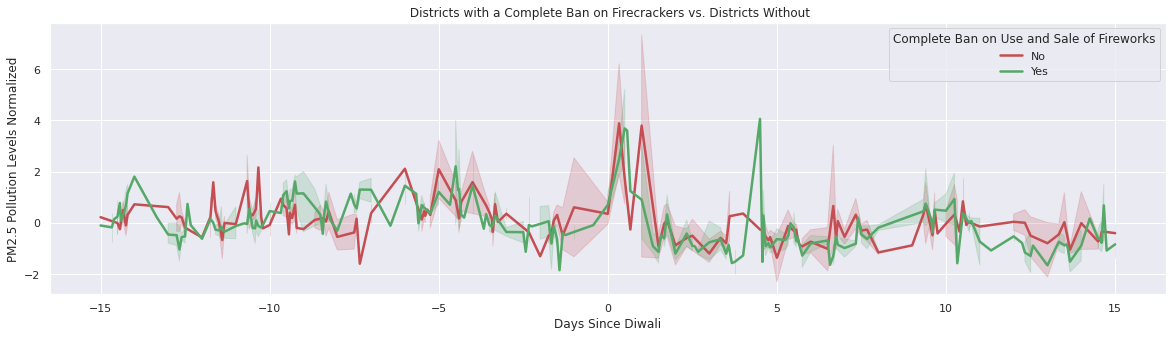

In [ ]:
sns.set_theme(style="darkgrid")
sns.lineplot(x = 'days_since_diwali', y = 'zscore',hue = 'Complete_B',data = pm25_pollution_data,palette=['r', 'g'], linewidth=2.5, ci=95)
sns.set(rc = {'figure.figsize': (20, 10)})
plt.title(" Districts with a Complete Ban on Firecrackers vs. Districts Without")
plt.legend(title='Complete Ban on Use and Sale of Fireworks', labels=['No', 'Yes'])
plt.xlabel('Days Since Diwali')
plt.ylabel('PM2.5 Pollution Levels Normalized')
plt.savefig('PM2.5_Pollution.png', dpi = 600)

In [ ]:
no2_pollution_data = india_fulldata_firecrackerban[india_fulldata_firecrackerban['parameter_y'] == 'no2']

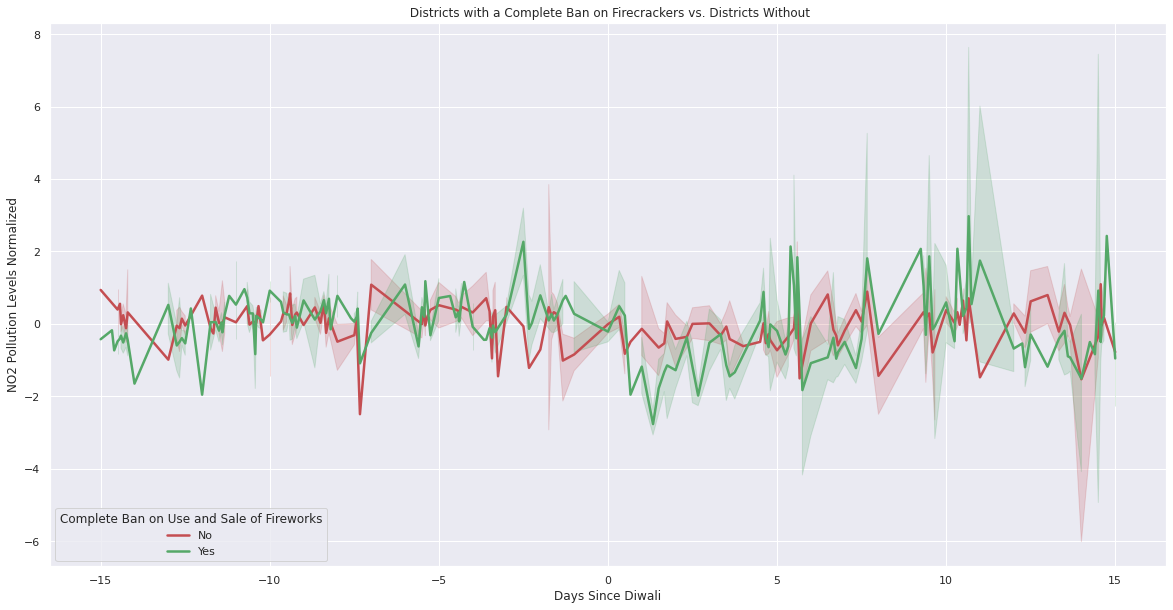

In [ ]:
sns.set_theme(style="darkgrid")
sns.lineplot(x = 'days_since_diwali', y = 'zscore',hue = 'Complete_B',data = no2_pollution_data,palette=['r', 'g'], linewidth=2.5, ci=95)
sns.set(rc = {'figure.figsize': (20, 10)})
plt.title(" Districts with a Complete Ban on Firecrackers vs. Districts Without")
plt.legend(title='Complete Ban on Use and Sale of Fireworks', loc = 'lower left' ,labels=['No', 'Yes'])
plt.xlabel('Days Since Diwali')
plt.ylabel('NO2 Pollution Levels Normalized')
plt.savefig('NO2_Pollution.png',dpi=600)

In [ ]:
so2_pollution_data = india_fulldata_firecrackerban[india_fulldata_firecrackerban['parameter_y'] == 'so2']

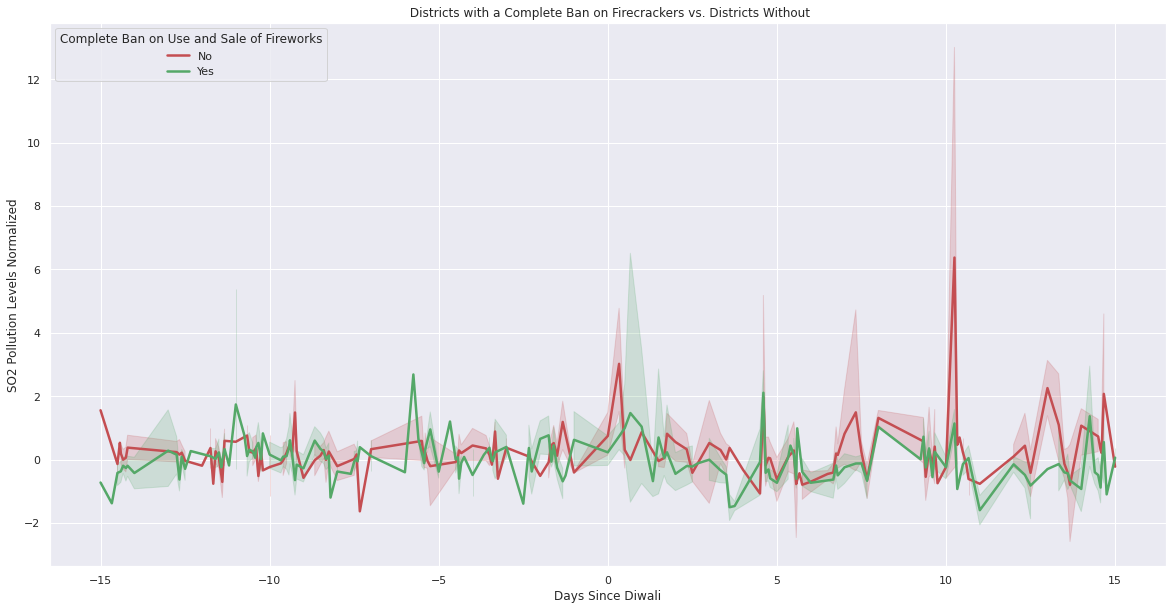

In [ ]:
sns.set_theme(style="darkgrid")
sns.lineplot(x = 'days_since_diwali', y = 'zscore',hue = 'Complete_B',data = so2_pollution_data,palette=['r', 'g'], linewidth=2.5, ci=95)
sns.set(rc = {'figure.figsize': (20, 10)})
plt.title(" Districts with a Complete Ban on Firecrackers vs. Districts Without")
plt.legend(title='Complete Ban on Use and Sale of Fireworks', loc = 'upper left' ,labels=['No', 'Yes'])
plt.xlabel('Days Since Diwali')
plt.ylabel('SO2 Pollution Levels Normalized')
plt.savefig('SO2_Pollution.png',dpi=600)

In [ ]:
pm10_pollution_data = india_fulldata_firecrackerban[india_fulldata_firecrackerban['parameter_y'] == 'pm10']

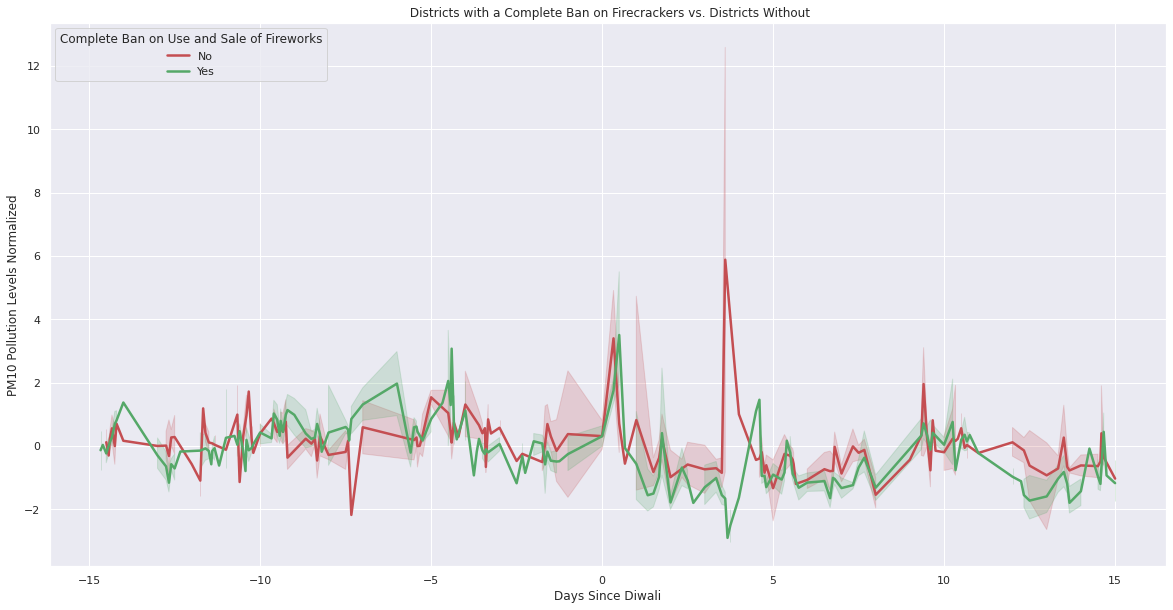

In [ ]:
sns.set_theme(style="darkgrid")
sns.lineplot(x = 'days_since_diwali', y = 'zscore',hue = 'Complete_B',data = pm10_pollution_data,palette=['r', 'g'], linewidth=2.5, ci=95)
sns.set(rc = {'figure.figsize': (20, 10)})
plt.title(" Districts with a Complete Ban on Firecrackers vs. Districts Without")
plt.legend(title='Complete Ban on Use and Sale of Fireworks', loc = 'upper left' ,labels=['No', 'Yes'])
plt.xlabel('Days Since Diwali')
plt.ylabel('PM10 Pollution Levels Normalized')
plt.savefig('pm10_Pollution.png',dpi=600)

In [ ]:
len(india_fulldata_firecrackerban)

20188

In [ ]:
len(np.unique(india_fulldata_firecrackerban['distname'].apply(lambda x: str(x))))

87

In [ ]:
len(np.unique(india_fulldata_firecrackerban['location']))